## Experimental Scenario

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine, i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is **to predict the number of remaining operational cycles before failure** in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import sys 
sys.path.append("../")
import cmapss

In [67]:
def load_data(index="FD004"):
    assert index in ["FD001", "FD002", "FD003", "FD004"]

    print("-----------------")
    print(f" Data Set: {index} ")
    print("-----------------")
    if index == "FD001":
        print("Train trjectories: 100")
        print("Test trajectories: 100")
        print("Conditions: ONE (Sea Level)")
        print("Fault Modes: ONE (HPC Degradation)\n")
    if index == "FD002":
        print("Train trjectories: 260")
        print("Test trajectories: 259")
        print("Conditions: SIX")
        print("Fault Modes: ONE (HPC Degradation)\n")
    if index == "FD003":
        print("Train trjectories: 100")
        print("Test trajectories: 100")
        print("Conditions: ONE (Sea Level)")
        print("Fault Modes: TWO (HPC Degradation, Fan Degradation)\n")
    if index == "FD004":
        print("Train trjectories: 248")
        print("Test trajectories: 249")
        print("Conditions: SIX")
        print("Fault Modes: TWO (HPC Degradation, Fan Degradation)\n")

    train_set = np.loadtxt(f"train_{index}.txt")
    test_set  = np.loadtxt(f"test_{index}.txt")

    col_names = ["unit number", "time"]
    col_names += [f"operational setting {i}" for i in range(1, 4)]
    col_names += [f"sensor measurement {i}" for i in range(1, 22)]
    print(len(col_names))
    train_set = pd.DataFrame(train_set, columns=col_names)
    test_set  = pd.DataFrame(test_set, columns=col_names)
    labels = np.loadtxt(f"RUL_{index}.txt")

    def set_dtype(df):
        return df.astype({
            "unit number": np.int64,
            "time": np.int64
        })

    train_set = set_dtype(train_set)
    test_set  = set_dtype(test_set)

    return train_set, test_set, labels

In [72]:
train_set, test_set, labels = load_data(index="FD004")

-----------------
 Data Set: FD004 
-----------------
Train trjectories: 248
Test trajectories: 249
Conditions: SIX
Fault Modes: TWO (HPC Degradation, Fan Degradation)

26


In [73]:
train_set

,unit number,time,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330.0,2212.0,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361.0,2324.0,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329.0,2212.0,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328.0,2212.0,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305.0,1915.0,84.93,14.03,8.6754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,380.16,2388.73,8185.69,8.4541,0.03,372.0,2319.0,100.00,29.11,17.5234
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,535.02,2388.46,8185.47,8.2221,0.03,396.0,2388.0,100.00,39.38,23.7151
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,535.41,2388.48,8193.94,8.2525,0.03,395.0,2388.0,100.00,39.78,23.8270
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,187.92,2388.83,8125.64,9.0515,0.02,337.0,2223.0,100.00,15.26,9.0774


In [74]:
test_set

,unit number,time,operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362.0,2324.0,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306.0,1915.0,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328.0,2212.0,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328.0,2212.0,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333.0,2223.0,100.00,14.85,8.9326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,130.87,2388.50,8112.61,9.4427,0.02,331.0,2212.0,100.00,10.53,6.2620
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,314.51,2388.33,8086.83,9.2772,0.02,366.0,2324.0,100.00,24.33,14.6486
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,182.76,2388.64,8100.84,9.3982,0.02,336.0,2223.0,100.00,14.69,8.8389
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,314.17,2388.37,8085.24,9.2727,0.03,366.0,2324.0,100.00,24.44,14.6887


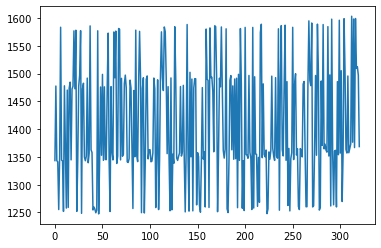

In [60]:
for _, g in train_set.groupby("unit number"):
    g["sensor measurement 3"].plot()
    break